In [1]:
import pandas as pd
import numpy as np
import ast 
import re

In [3]:
claude_df = pd.read_csv('Claude_3.5_haiku_evaluate.csv')
GPT_df = pd.read_csv('GPT_4o_mini_evaluate.csv')
Gemini_df = pd.read_csv('Gemini_2.0_flash_evaluate.csv')
Deepseek_df = pd.read_csv('Deepseek_V3_evaluate.csv')

In [4]:
def extract_content(text):
    match = re.search(r"content='([^.'\\]+)", text)
    return match.group(1) if match else None

In [5]:
claude_df['danhGiaDung'] = claude_df['danhGiaDung'].apply(extract_content)
claude_df['danhGiaAoGiac'] = claude_df['danhGiaAoGiac'].apply(extract_content)
GPT_df['danhGiaDung'] = GPT_df['danhGiaDung'].apply(extract_content)
GPT_df['danhGiaAoGiac'] = GPT_df['danhGiaAoGiac'].apply(extract_content)
Gemini_df['danhGiaDung'] = Gemini_df['danhGiaDung'].apply(extract_content)
Gemini_df['danhGiaAoGiac'] = Gemini_df['danhGiaAoGiac'].apply(extract_content)
Deepseek_df['danhGiaDung'] = Deepseek_df['danhGiaDung'].apply(extract_content)
Deepseek_df['danhGiaAoGiac'] = Deepseek_df['danhGiaAoGiac'].apply(extract_content)


In [6]:
claude_df.to_csv("PostProcess_Claude_3.5_Haiku_evaluate.csv", encoding='utf-8-sig', index=False)
GPT_df.to_csv("PostProcess_GPT_4o_mini_evaluate.csv", encoding='utf-8-sig', index=False)
Gemini_df.to_csv("PostProcess_Gemini_2.0_flash_evaluate.csv", encoding='utf-8-sig', index=False)
Deepseek_df.to_csv("PostProcess_Deepseek_V3_evaluate.csv", encoding='utf-8-sig', index=False)

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
def demoPlot(df, name):
    TP = df[df['danhGiaDung']=='Không'].shape[0]
    FP = df[df['danhGiaDung']=='Có'].shape[0]
    TN = df[df['danhGiaAoGiac']=='Có'].shape[0]
    FN = df[df['danhGiaAoGiac']=='Không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    fig, ax = plt.subplots(figsize=(6, 6))

    colors = np.array([["#4CAF50",  
                        "#F44336"], 
                    ["#FF9800", 
                        "#2196F3"]]) 

    for i in range(2):
        for j in range(2):
            ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=colors[i, j], alpha=0.7))
            ax.text(j, i, str(conf_matrix[i, j]), va='center', ha='center', color='white', fontsize=16, fontweight='bold')

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Positive", "Negative"], fontsize=12)
    ax.set_yticklabels(["Positive", "Negative"], fontsize=12)


    ax.set_xlabel("Predicted Class", fontsize=14)
    ax.set_ylabel("True Class", fontsize=14)


    ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)


    ax.tick_params(which='minor', bottom=False, left=False)
    plt.title(name, fontsize=16, pad=20)

    metrics_text = (f"Accuracy: {accuracy:.4f}    "
                    f"Precision: {precision:.4f}    "
                    f"Recall: {recall:.4f}    "
                    f"F1 Score: {f1_score:.4f}")
    plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=14, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 1])  
    plt.show()

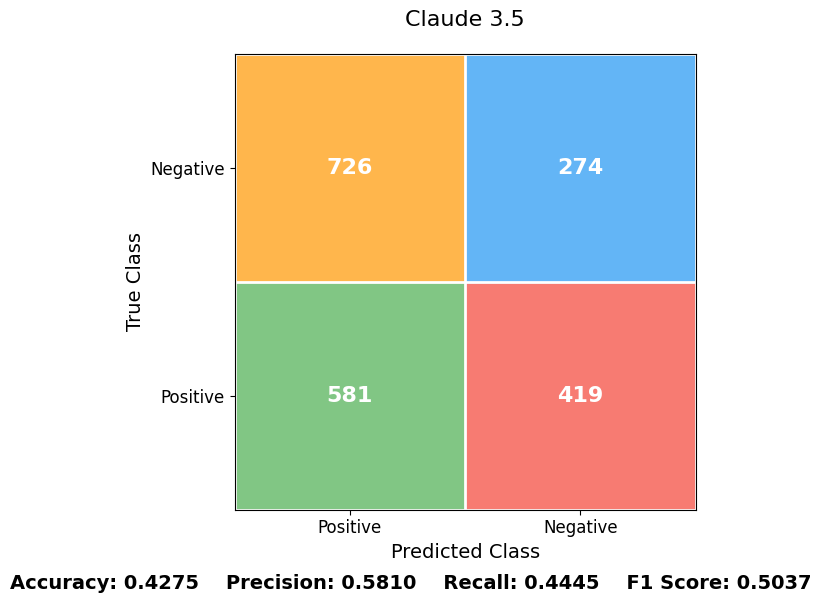

In [15]:
demoPlot(claude_df, "Claude 3.5")

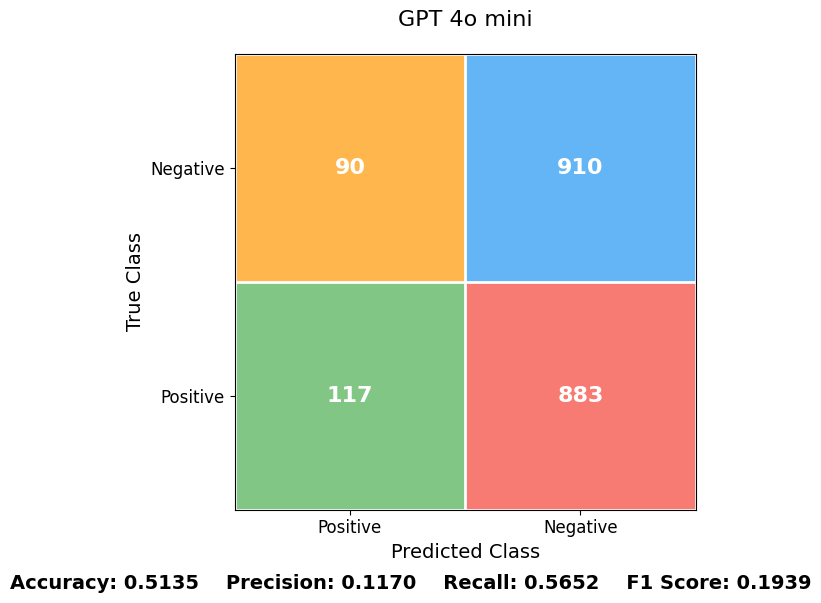

In [16]:
demoPlot(GPT_df, "GPT 4o mini")

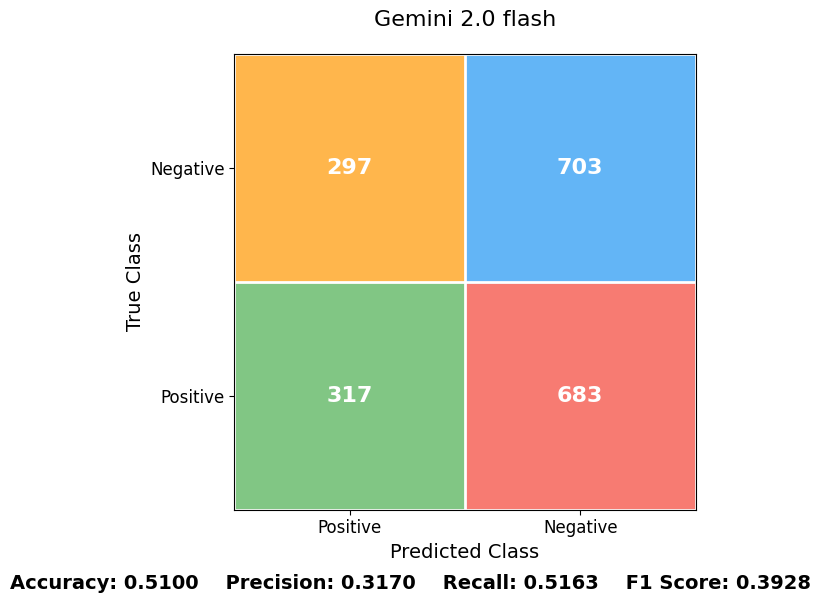

In [18]:
demoPlot(Gemini_df, "Gemini 2.0 flash")

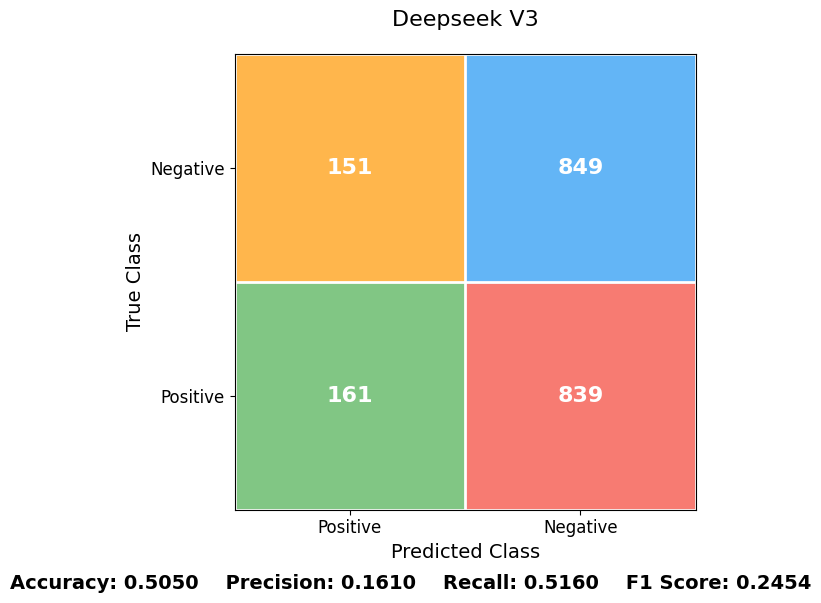

In [19]:
demoPlot(Deepseek_df, "Deepseek V3")